In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm

from matplotlib import pyplot as plt

from scipy.stats import shapiro

import seaborn as sns

import numpy as np

In [2]:
df = pd.read_csv("data/advertising.csv", index_col="id")

In [3]:
df.min()

tv           0.7
radio        0.0
newspaper    0.3
sales        1.6
dtype: float64

In [4]:
df[df["radio"] == 0]

,tv,radio,newspaper,sales
id,,,,
128,80.2,0.0,9.2,8.8


In [5]:
X = df[["tv", "radio", "newspaper"]]
y = df["sales"]

In [6]:
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=42)

X_train = X_train.drop(128)
y_train = y_train.drop(128)

X_train_log = np.log(X_train)
y_train_log = np.log(y_train)

X_test_log = np.log(X_test)
y_test_log = np.log(y_test)

In [7]:
# model = DummyRegressor()
model = LinearRegression()

In [8]:
model.fit(X_train_log, y_train_log)

LinearRegression()

In [9]:
y_hat_train_log = model.predict(X_train_log)
y_hat_test_log = model.predict(X_test_log)

In [10]:
train_mse = mean_squared_error(np.exp(y_train_log), np.exp(y_hat_train_log))
test_mse = mean_squared_error(np.exp(y_test_log), np.exp(y_hat_test_log))

print(train_mse)
print(test_mse)

2.3720080335652165
1.9938216766765329


In [11]:
print(model.intercept_)
print(model.coef_)

0.38681094596736276
[0.35380028 0.16512043 0.02034969]


In [12]:
X_train_sm = sm.add_constant(X_train_log)
results = sm.OLS(y_train_log, X_train_sm).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     611.8
Date:                Tue, 11 Feb 2025   Prob (F-statistic):           4.51e-82
Time:                        15:47:58   Log-Likelihood:                 113.20
No. Observations:                 149   AIC:                            -218.4
Df Residuals:                     145   BIC:                            -206.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3868      0.057      6.742      0.000       0.273       0.500
tv             0.3538      0.009     37.533      0.000       0.335       0.372
radio          0.1651      0.009     17.889      0.000       0.147       0.183
newspaper      0.0203      0.010      2.026      0.045       0.000       0.040
==============================================================================
Omnibus:                       21.374   Durbin-Watson:                   2.199
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.003
Skew:                           0.595   Prob(JB):                     6.21e-11
Kurtosis:                       5.481   Cond. No.                         40.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
e = (y_train_log - y_hat_train_log)
std_residuals = (e - e.mean()) / e.std(ddof=1)

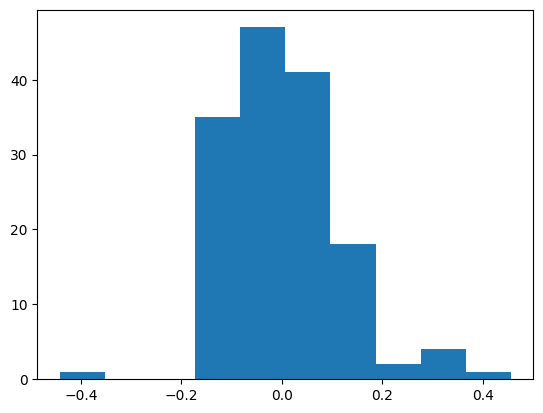

In [14]:
plt.hist(e)
plt.show()

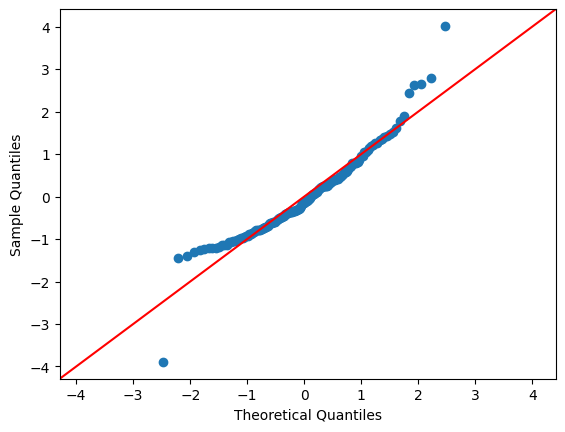

In [15]:
sm.qqplot(std_residuals, line="45")
plt.show()

In [16]:
shapiro(e)

ShapiroResult(statistic=np.float64(0.9424182237573936), pvalue=np.float64(8.630238667719321e-06))